In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [2]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"

train_losses_t = {}
train_accuracies_t = {}
val_losses_t = {}
val_accuracies_t = {}
test_accuracies_t = {}
for t in range(10, 250, 50):
    print(f"Training for {t} steps")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=t, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_t[t] = train_losses
    train_accuracies_t[t] = train_accuracies
    val_losses_t[t] = val_losses
    val_accuracies_t[t] = val_accuracies

    test_accuracies_t[t] = evaluate_model(model, test_loader)

out_file_name = 'exp1_t_10_250_50_bs_128_ep_10.pkl' # exp1, t=10...250, step=50, batch_size=128, epochs=10
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_t, "train_accuracies": train_accuracies_t, "val_losses": val_losses_t, "val_accuracies": val_accuracies_t, "test_accuracies": test_accuracies_t}, f)


Training for 10 steps
Epoch 1/10, Train Loss: 2.2949, Train Accuracy: 17.80%, Val Loss: 2.2341, Val Accuracy: 19.31%, Time: 2.51s
Epoch 2/10, Train Loss: 2.2282, Train Accuracy: 19.51%, Val Loss: 2.2084, Val Accuracy: 20.64%, Time: 2.45s
Epoch 3/10, Train Loss: 2.2138, Train Accuracy: 19.97%, Val Loss: 2.2110, Val Accuracy: 19.86%, Time: 2.44s
Epoch 4/10, Train Loss: 2.2088, Train Accuracy: 20.07%, Val Loss: 2.2093, Val Accuracy: 20.07%, Time: 2.46s
Epoch 5/10, Train Loss: 2.2039, Train Accuracy: 20.10%, Val Loss: 2.2029, Val Accuracy: 21.02%, Time: 2.44s
Epoch 6/10, Train Loss: 2.1991, Train Accuracy: 20.46%, Val Loss: 2.2023, Val Accuracy: 19.61%, Time: 2.47s
Epoch 7/10, Train Loss: 2.1988, Train Accuracy: 20.33%, Val Loss: 2.2044, Val Accuracy: 20.36%, Time: 2.47s
Epoch 8/10, Train Loss: 2.1967, Train Accuracy: 20.35%, Val Loss: 2.1997, Val Accuracy: 20.20%, Time: 2.49s
Epoch 9/10, Train Loss: 2.1954, Train Accuracy: 20.40%, Val Loss: 2.2022, Val Accuracy: 19.53%, Time: 2.48s
Epoch 

In [3]:
for t in [250, 300, 400, 500]:
    print(f"Training for {t} steps")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=t, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_t[t] = train_losses
    train_accuracies_t[t] = train_accuracies
    val_losses_t[t] = val_losses
    val_accuracies_t[t] = val_accuracies

    test_accuracies_t[t] = evaluate_model(model, test_loader)

out_file_name = 'exp1_t_10_500_bs_128_ep_10.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_t, "train_accuracies": train_accuracies_t, "val_losses": val_losses_t, "val_accuracies": val_accuracies_t, "test_accuracies": test_accuracies_t}, f)


Training for 250 steps
Epoch 1/10, Train Loss: 1.8794, Train Accuracy: 34.99%, Val Loss: 1.7109, Val Accuracy: 39.51%, Time: 73.16s
Epoch 2/10, Train Loss: 1.5772, Train Accuracy: 41.71%, Val Loss: 1.6240, Val Accuracy: 40.68%, Time: 80.62s
Epoch 3/10, Train Loss: 1.5151, Train Accuracy: 43.05%, Val Loss: 1.5870, Val Accuracy: 41.85%, Time: 84.23s
Epoch 4/10, Train Loss: 1.4975, Train Accuracy: 43.85%, Val Loss: 1.4994, Val Accuracy: 43.77%, Time: 82.99s
Epoch 5/10, Train Loss: 1.4713, Train Accuracy: 44.44%, Val Loss: 1.4170, Val Accuracy: 46.05%, Time: 87.79s
Epoch 6/10, Train Loss: 1.4592, Train Accuracy: 44.72%, Val Loss: 1.4618, Val Accuracy: 44.56%, Time: 88.91s
Epoch 7/10, Train Loss: 1.4431, Train Accuracy: 45.19%, Val Loss: 1.4324, Val Accuracy: 43.84%, Time: 83.21s
Epoch 8/10, Train Loss: 1.4168, Train Accuracy: 45.74%, Val Loss: 1.4167, Val Accuracy: 44.56%, Time: 91.76s
Epoch 9/10, Train Loss: 1.4224, Train Accuracy: 45.71%, Val Loss: 1.4921, Val Accuracy: 44.46%, Time: 89.

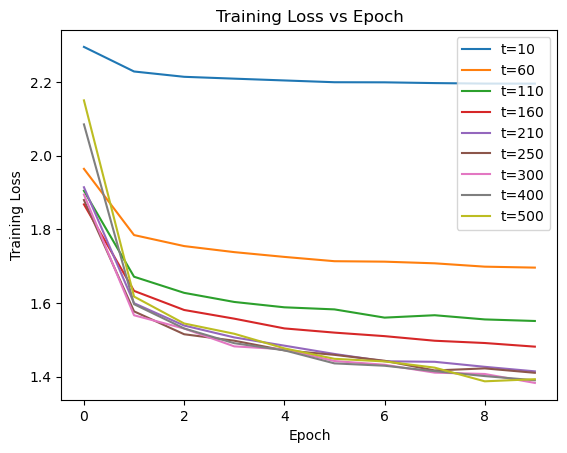

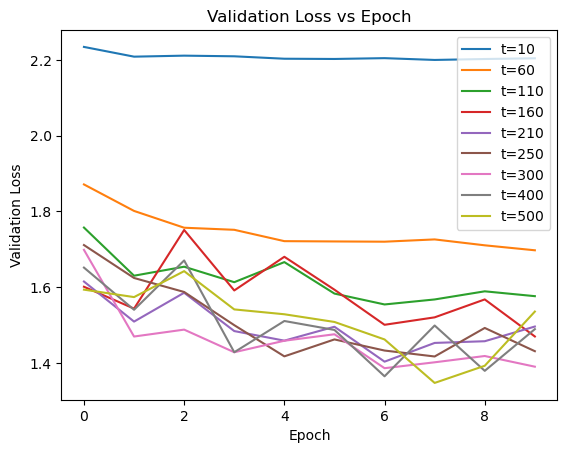

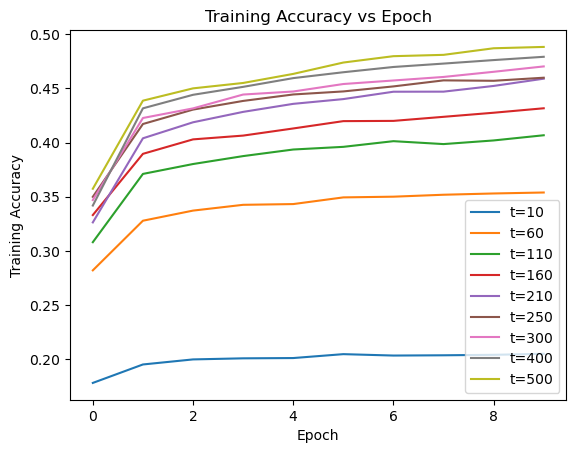

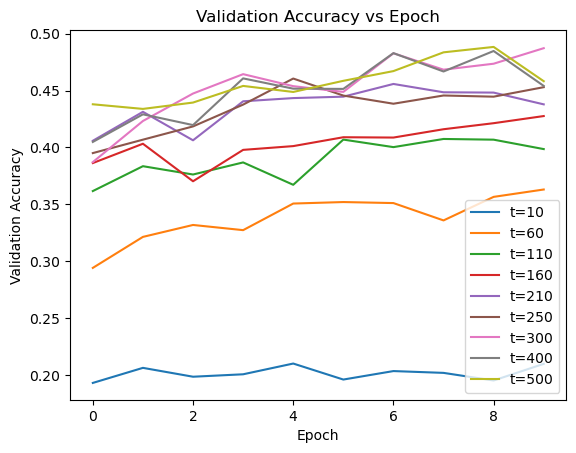

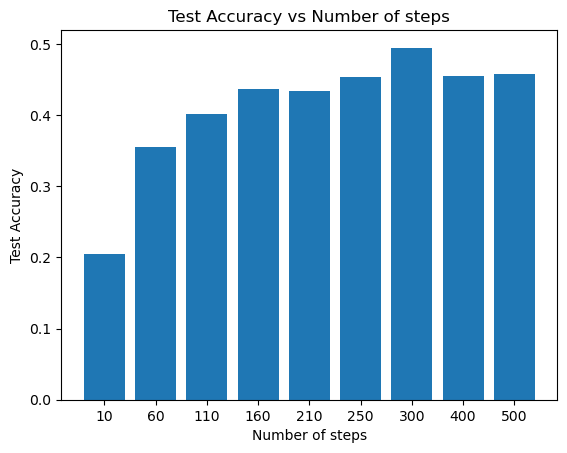

In [5]:
# Plotting
plt.figure()
for t in train_losses_t.keys():
    plt.plot(train_losses_t[t], label=f"t={t}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss vs Epoch")
    plt.legend()

plt.figure()
for t in val_losses_t.keys():
    plt.plot(val_losses_t[t], label=f"t={t}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.title("Validation Loss vs Epoch")
    plt.legend()

plt.figure()
for t in train_accuracies_t.keys():
    plt.plot(train_accuracies_t[t], label=f"t={t}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.title("Training Accuracy vs Epoch")
    plt.legend()

plt.figure()
for t in val_accuracies_t.keys():
    plt.plot(val_accuracies_t[t], label=f"t={t}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy vs Epoch")
    plt.legend()

plt.figure()
plt.bar([str(x) for x in test_accuracies_t.keys()], test_accuracies_t.values())
plt.xlabel("Number of steps")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Number of steps")
plt.show()